# <center><b>Course</b></center>

<div style="text-align:center">
    <img src="../images/pandas_logo.svg" width="600px">
    <div>
       Bertrand Néron, François Laurent, Etienne Kornobis
       <br />
       <a src=" https://research.pasteur.fr/en/team/bioinformatics-and-biostatistics-hub/">Bioinformatics and Biostatistics HUB</a>
       <br />
       © Institut Pasteur, 2021
    </div>    
</div>

# Intro

**Pandas** is a library to manipulate data structures and perform data analysis and visualization. Pandas is built on top of **Numpy**, a widely used library for mathematical operation particularly on arrays and matrices. Pandas is helping with data analysis stack, including data cleaning/formatting followed by analysis and visualization.

Pandas is particularly well suited to deal with tabular data which can be imported from different formats such are **csv**, **tsv** or even **xlsx**.

The two primary data structures in pandas are **Series** and **DataFrames**.

Pandas is designed to manipulate tabulated data, Numpy is designed to do computation on arrays. So here are the differences: 

**Numpy** 
* handles one structure: the ndarray.
* an *array* can have 1, 2 or more dimensions.
* A *ndarray* handles homogeneous data, only one datatype in an array.
* So numpy is mostly used to do math on arrays.

**Pandas** 
* *Series* have 1 dimension, *DataFrame* have 2 dimensions.
* *Pandas* does **not** handle structures with more than 2 dimensions.
* But a *DataFrame* can contain heterogenous data, each column can have a different datatype.
* *Pandas* is more powerful to query data or manipulate them.

So *Numpy* is mostly used to do math, *Pandas* to explore data structured in tables. 

# Installation

For *conda* users

```shell
conda install pandas
```

for *pip* users
```shell
pip install pandas
```

# Import Convention

In [1]:
import numpy as np
import pandas as pd

# Series

A Series is a one-dimensional array with axis labels. Labels do not need to be
unique (but it's a better practice if they are) but must be hashable.

To create a series, use the pandas `Series` object and specify a list or tuple
of value to feed your series with as the first argument:

In [2]:
series_nolabel = pd.Series([1,2,3])
type(series_nolabel)

pandas.core.series.Series

In [3]:
series_nolabel

0    1
1    2
2    3
dtype: int64

You can specify the labels of your Series by providing a list of labels with the `index` argument:

In [4]:
series_label = pd.Series([1,2,3], index=['A', 'B', 'C'])
series_label

A    1
B    2
C    3
dtype: int64

And we can access these indices with the `index` property:

In [5]:
series_nolabel.index

RangeIndex(start=0, stop=3, step=1)

In [6]:
series_label.index

Index(['A', 'B', 'C'], dtype='object')

## Indexing/Slicing

The syntax used for slicing Series in pandas is similar to the syntax used to slice lists in python, see for example: 

In [7]:
ex_list = [1,2,3]
ex_list[0]

1

In [8]:
ex_list[0:2]

[1, 2]

In [9]:
ex_list[::-1]

[3, 2, 1]

In order to subset a serie based on an **integer index**, you can use the `iloc` attribute with the same syntax as with lists slices:

In [10]:
series_nolabel

0    1
1    2
2    3
dtype: int64

In [11]:
series_nolabel.iloc[1]

np.int64(2)

In [12]:
series_label.iloc[1]

np.int64(2)

In [13]:
series_label.iloc[0:2]

A    1
B    2
dtype: int64

In [14]:
series_label.iloc[::-1]

C    3
B    2
A    1
dtype: int64

Most commonly, You can use **labels** as well for subsetting, using the `loc` attribute:

In [15]:
series_label.loc["B"]

np.int64(2)

**WARNING**: With `loc`, the value is interpreted as a label of the
   index, and **never** as an integer position along the index, there is `iloc` for this.
   
When index labels are strings, you can as well access the corresponding value using this simple syntax `.LABEL_VALUE`

In [16]:
series_label.A

np.int64(1)

Serie objects benefit from many attributes and methods (see [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)), lot's of them being common with pandas DataFrames. We will see some of the ones listed below in action in the DataFrame section of this course.

Here are some attributes of interest:

|Attribute|Action|
|-|-|
|index|Returns the index (0 axis labels) of the Series|
|name|Return the name of the Series|
|shape|Return the number of element in the Series|

And some useful methods:

|Method|Action|
|-|-|
|aggregate|Aggregate using one or more operations over the specified axis|
|all|Return whether all elements are True potentially over an axis|
|any|Return whether any element is True potentially over an axis|
|apply|Invoke function on values of Series|
|astype|Cast a pandas object to a specified dtype|
|copy|Make a copy of this object’s indices and data|
|count|Return number of non-NA/null observations in the Series|
|describe|Generate descriptive statistics that summarize the central tendency dispersion and shape of a dataset’s distribution, excluding NaN values|
|drop|Return Series with specified index labels removed|
|groupby|Group DataFrame or Series using a mapper or by a Series of columns|
|head / tail|Return the first / last n rows|
|max, min, median, mean, sum|Perform the corresponding operation on the Serie|
|plot|Plot graphs from Serie/DataFrame|
|reset_index|Generate a new DataFrame or Series with the index reset|
|sort_values|Sort by values a the specified column|
|str|String methods for series|              |
|to_csv, to_excel|Export to csv or excel file|
|unique|Return unique values of Series object|
|value_counts|Return a Series containing counts of unique values|


## Operations on Series

Comparison operators (ie `==`, `<`, `<=`, `>=`, `>`) can be used on Series as well as DataFrames for subsetting.

For example, we want to see which values are superior to 1 in our previous Series:

In [17]:
series_label > 1

A    False
B     True
C     True
dtype: bool

On top of labels, `loc` can actually take a list or Series of booleans as input. We can therefore apply this boolean Series `series_label > 1` as a mask:

In [18]:
series_label.loc[series_label > 1]

B    2
C    3
dtype: int64

## Operations between Series

Operations (ie `+`, `-`, `*`, `/`) between Series will trigger an alignment of the values
based on the index values:

In [19]:
series_label + series_label

A    2
B    4
C    6
dtype: int64

We can see here that the label are aligned prior operation

In [20]:
series_label + series_label.iloc[::-1]

A    2
B    4
C    6
dtype: int64

# DataFrames

A pandas DataFrame is a two-dimensional data structure with axis labels. Labels do not need to be unique but must be hashable. DataFrame in pandas are like dictionary containers of Series objects.

## DataFrame Terminology

<img src="../images/pandas_dataframe.png" width="300px" />

## Create a DataFrame

[Dataframes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) in pandas are rarely created from scratch. One common approach is to create a pandas DataFrame from a dictionary or a file, but you can as well create them from a list of lists or numpy ndarrays. 

### From a list of lists:

In [21]:
df = pd.DataFrame([[1,2,3],
                   [4,5,6]],
                 columns=['A', 'B', 'C'],
                 index= ['a', 'b'])
df

,A,B,C
a,1,2,3
b,4,5,6


In [22]:
df.index

Index(['a', 'b'], dtype='object')

In [23]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

### From a numpy ndarray

In [24]:
df = pd.DataFrame(np.arange(12).reshape(4,3))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


### From a dictionnary

In [25]:
df = pd.DataFrame({'A': [1,2,3],
                   'B': np.arange(4,7),
                  })
                   
df

,A,B
0,1,4
1,2,5
2,3,6


- From a file, many options are available, to name only a few:
    - [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    - [pd.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
    - [pd.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
    
NB: For excel and html imports, you might need to install extra libraries.

In [26]:
titanic = pd.read_csv("../data/titanic.csv")

We want now to open *data/bar_data.tsv* file but the 2 first lines are comments and the separator between fields is *tab*

See below the 5 first lines (using the `!` jupyter magic for bash subprocesses)

In [27]:
! head -5 ../data/bar_data.tsv

# generated with fooo software version 12bis
# 2021/02/31
cond1	cond2	cond3	control
14.644417316782045	2.9453091400880465	24.81171864537413	5.114340165446571
12.071043262601615	4.406424332565544	21.574601309211538	2.5071180945299716


You can import this file using the `sep` and `comment` arguments:

In [28]:
bar = pd.read_csv("../data/bar_data.tsv", sep="\t", comment="#")
bar.head()

,cond1,cond2,cond3,control
0,14.644417,2.945309,24.811719,5.114340
1,12.071043,4.406424,21.574601,2.507118
2,8.227469,3.185252,20.651623,4.449593
3,8.980799,9.233560,24.859737,4.127919
4,9.080359,5.629192,18.443504,4.268572


If the data in the file are already indexed like in the file _data_for_plt.csv_ :

In [29]:
! head -5 ../data/data_for_plt.csv

	MW	AlogP	PSA	HBA
0	0.0	1.0	72.73111270481336	1.1416684150966834
1	3.63	544.59	391.4275648686457	0.9848635571682688
2	2.11	383.4	437.4589821943501	15.040385372412596
3	1.24	162.23	480.1112629835199	11.401906578750385


In [30]:
data = pd.read_csv("../data/data_for_plt.csv", sep="\t")
data.head(3)

,Unnamed: 0,MW,AlogP,PSA,HBA
0,0,0.00,1.00,72.731113,1.141668
1,1,3.63,544.59,391.427565,0.984864
2,2,2.11,383.40,437.458982,15.040385


To avoid to have an extra column, you can specify which columns to use as index.
This column **must** have distincts values.

In [31]:
data = pd.read_csv("../data/data_for_plt.csv", sep="\t", index_col=0)
data.head()

,MW,AlogP,PSA,HBA
0,0.00,1.00,72.731113,1.141668
1,3.63,544.59,391.427565,0.984864
2,2.11,383.40,437.458982,15.040385
3,1.24,162.23,480.111263,11.401907
4,-1.37,361.37,448.864769,5.732690


The first line is used as header.<br />
So you can specify the number of the row which represents the header,
or you can set this parameter to None if the table has no header.

In [32]:
data = pd.read_csv("../data/no_header.tsv", sep="\t", index_col=0, header=None)
data.head()

,1,2,3,4
0,,,,
0,0.00,1.00,72.731113,1.141668
1,3.63,544.59,391.427565,0.984864
2,2.11,383.40,437.458982,15.040385
3,1.24,162.23,480.111263,11.401907
4,-1.37,361.37,448.864769,5.732690


### Going back to np.array and list

In [33]:
df.values

array([[1, 4],
       [2, 5],
       [3, 6]])

In [34]:
df.values.tolist()

[[1, 4], [2, 5], [3, 6]]

## Characterizing a DataFrame

Several DataFrame attributes and methods are provided to characterize your dataset. Here is a subset of them most commonly used.

In [35]:
titanic = pd.read_csv("../data/titanic.csv")

`shape` to get the dimensions of the dataframe (ie number or rows, number of columns):

In [36]:
print(f"The titanic dataset is {len(titanic)} in length.")
rows, cols = titanic.shape
print(f"The titanic dataset contains {rows} rows x {cols} columns.")

The titanic dataset is 891 in length.
The titanic dataset contains 891 rows x 12 columns.


`head` method is useful to get the first lines of your dataframe:

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


`tail` to get the last lines of your dataframe:

In [39]:
titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Use `describe` method to have basic descriptive statistics. The columns on which pandas cannot do statistics are omitted (Name, Sex, ...)

In [40]:
desc = titanic.describe()
desc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
print(f"Titanic data have {len(titanic.columns)} cols\nand describe output have {len(desc.columns)} cols")

Titanic data have 12 cols
and describe output have 7 cols


`median` to get the median by columns with numerical values:

In [42]:
titanic.median()

TypeError: Cannot convert [['Braund, Mr. Owen Harris'
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'Heikkinen, Miss. Laina' ... 'Johnston, Miss. Catherine Helen "Carrie"'
  'Behr, Mr. Karl Howell' 'Dooley, Mr. Patrick']
 ['male' 'female' 'female' ... 'female' 'male' 'male']
 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' ... 'W./C. 6607' '111369'
  '370376']
 [nan 'C85' nan ... nan 'C148' nan]
 ['S' 'C' 'S' ... 'S' 'C' 'Q']] to numeric

To prepare for future versions of pandas, better to select the columns you actually want the median to be calculated with:

In [43]:
titanic.median(numeric_only=True)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

`mean` similarly for the mean:

In [44]:
titanic.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

`value_counts` is useful the count the number of occurences of a value. For example:

In [45]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

`max` and `min` to get the maximum and minimum:

In [46]:
titanic.Age.max()

np.float64(80.0)

In [47]:
titanic.Age.min()

np.float64(0.42)

## DataFrame manipulation

### Renaming columns

In [48]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                 columns=['A', 'B', 'C'])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [49]:
cols = list(df.columns)
cols[2] = 'Z'
df.columns = cols
df.columns

Index(['A', 'B', 'Z'], dtype='object')

In [50]:
df.columns = ['X', 'Y', 'Z']
df

,X,Y,Z
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Using the `rename` method and specifying a dictionnary for the changes:

In [51]:
df.rename(columns={'X': 'A'})

,A,Y,Z
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


### Renaming index

In [52]:
df.index = ['a', 'b', 'c', 'e']
df

,X,Y,Z
a,0,1,2
b,3,4,5
c,6,7,8
e,9,10,11


In [53]:
df.rename(index={'e':'d'})

,X,Y,Z
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


### Adding columns

In [54]:
df['id'] = [0, 400, 3,12]
df

,X,Y,Z,id
a,0,1,2,0
b,3,4,5,400
c,6,7,8,3
e,9,10,11,12


You can also add columns by concatenating two dataframes with the `concat` method (axis argument is use to perform the concatenation along lines or along columns):

In [55]:
pd.concat([df, df], axis=1)

,X,Y,Z,id,X,Y,Z,id
a,0,1,2,0,0,1,2,0
b,3,4,5,400,3,4,5,400
c,6,7,8,3,6,7,8,3
e,9,10,11,12,9,10,11,12


### Set column as index

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [56]:
df.set_index("id")

,X,Y,Z
id,,,
0,0,1,2
400,3,4,5
3,6,7,8
12,9,10,11


We can see here that the original dataframe is not modified with this method:

In [57]:
df

,X,Y,Z,id
a,0,1,2,0
b,3,4,5,400
c,6,7,8,3
e,9,10,11,12


The `inplace` argument is present accross different pandas methods in order to directly edit the object we are working on instead of creating a new object:

In [58]:
df.set_index("id", inplace=True)

In [59]:
df

,X,Y,Z
id,,,
0,0,1,2
400,3,4,5
3,6,7,8
12,9,10,11


### Reset index
The opposite operation is to turn the index into a normal column and regenerate a basic integer index

In [60]:
df.reset_index()

,id,X,Y,Z
0,0,0,1,2
1,400,3,4,5
2,3,6,7,8
3,12,9,10,11


### Add row

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
> https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [61]:
rows = pd.DataFrame([[30, 31, 32], [42, 43, 44]], columns=['X', 'Y', 'Z']) 

Notice here from the documentation that we are using the default `axis=0` (ie a concatenation along rows).

In [62]:
pd.concat([df, rows])

,X,Y,Z
0,0,1,2
400,3,4,5
3,6,7,8
12,9,10,11
0,30,31,32
1,42,43,44


You can choose also to `ignore_index`, similar to reseting and dropping the indices (but note that the index values on the other axes (i.e. the columns) are still respected in the concatenation):

In [63]:
pd.concat([df, df], ignore_index=True)

,X,Y,Z
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,0,1,2
5,3,4,5
6,6,7,8
7,9,10,11


### Indexing/Slicing

> https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

As for pandas Series, you can use `loc` (with labels or booleans) and `iloc` (with integers) for indexing/slicing.

The first argument between square brackets represents rows and the second columns, i.e:

**[row indices, column indices]**

Both methods use the same syntax as numpy indexing/slicing.

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic.loc[[1,2], ['Sex', 'Age']]

,Sex,Age
1,female,38.0
2,female,26.0


In [66]:
titanic.loc[1:4, 'Sex':'Ticket'] # Ticket column is included

,Sex,Age,SibSp,Parch,Ticket
1,female,38.0,1,0,PC 17599
2,female,26.0,0,0,STON/O2. 3101282
3,female,35.0,1,0,113803
4,male,35.0,0,0,373450


In [67]:
titanic.iloc[[0,1], [4, 5]]

,Sex,Age
0,male,22.0
1,female,38.0


In [68]:
titanic.iloc[0:3, 4:9] # the 9th column is exclude

,Sex,Age,SibSp,Parch,Ticket
0,male,22.0,1,0,A/5 21171
1,female,38.0,1,0,PC 17599
2,female,26.0,0,0,STON/O2. 3101282


### Selecting columns

A single column selection returns a Series:

In [69]:
titanic.loc[:,'Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

This syntax can be used as well for the same output:

In [70]:
titanic.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Multiple columns selection returns a DataFrame:

In [71]:
titanic.loc[:,['Sex', 'Age', 'Pclass', 'Survived']].head()

,Sex,Age,Pclass,Survived
0,male,22.0,3,0
1,female,38.0,1,1
2,female,26.0,3,1
3,female,35.0,1,1
4,male,35.0,3,0


### Selecting on a condition

As in Series, `loc` accepts boolean arguments for selection:

In [72]:
titanic.loc[titanic['Age'] > 60].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


We will see also the `query` method select on conditions.

When working on columns containing strings, useful methods like `str.contains` are available for subsetting:

In [73]:
mask = titanic.loc[:,'Name'].str.contains('^Bec')
titanic.loc[mask, ['Name', 'Age']]

,Name,Age
183,"Becker, Master. Richard F",1.0
248,"Beckwith, Mr. Richard Leonard",37.0
618,"Becker, Miss. Marion Louise",4.0
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0


### Selecting random samples

> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [74]:
titanic.sample(n=6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


### isin

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

In [75]:
titanic[titanic['PassengerId'].isin([457, 352, 174])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.925,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.000,C128,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.550,E38,S


### where

Where cond is **True**, **keep the original** value.<br />
Where **False**, **replace** with corresponding value from other.

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

In [76]:
df = pd.DataFrame(np.arange(-4, 6).reshape(-1, 2), columns=['A', 'B'])
df

,A,B
0,-4,-3
1,-2,-1
2,0,1
3,2,3
4,4,5


In [77]:
df.where(df < 0 , 0)

,A,B
0,-4,-3
1,-2,-1
2,0,0
3,0,0
4,0,0


In [78]:
df.where(df > 0 , -df)

,A,B
0,4,3
1,2,1
2,0,1
3,2,3
4,4,5


### mask

Replace values where the condition is True (the opposite of `where`)

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

In [79]:
df.mask(df < 0, 0)

,A,B
0,0,0
1,0,0
2,0,1
3,2,3
4,4,5


In [80]:
df.mask(df < 0, -df)

,A,B
0,4,3
1,2,1
2,0,1
3,2,3
4,4,5


### query

Query the columns of a DataFrame with a boolean expression.

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [81]:
titanic.query("Survived == 1").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Composing with "and" (`&`) "or" (`|`) operators:

In [82]:
titanic.query("Survived == 1 & Sex == 'female'").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


You can refer to variables in the environment by prefixing them with an ‘@’ character 

In [83]:
vips = titanic.Name.sample(5)

In [84]:
vips

26            Emir, Mr. Farred Chehab
229           Lefebre, Miss. Mathilde
131    Coelho, Mr. Domingos Fernandeo
499                Svensson, Mr. Olof
143               Burke, Mr. Jeremiah
Name: Name, dtype: object

In [85]:
titanic.query("Name in @vips")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S


### drop_duplicates

Return DataFrame with duplicated rows removed.

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [86]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


By default, it removes duplicate rows based on all columns:

In [87]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


To remove duplicates on specific column(s), use subset:

In [88]:
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


To remove duplicates and keep last occurrences, use keep:

In [89]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


## Group data

In [90]:
for p_class, df in titanic.groupby('Pclass'):
    print(f"##################### {p_class} #########################")
    print(df.loc[:,['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']])

##################### 1 #########################
     PassengerId  Survived  Pclass     Sex   Age
1              2         1       1  female  38.0
3              4         1       1  female  35.0
6              7         0       1    male  54.0
11            12         1       1  female  58.0
23            24         1       1    male  28.0
..           ...       ...     ...     ...   ...
871          872         1       1  female  47.0
872          873         0       1    male  33.0
879          880         1       1  female  56.0
887          888         1       1  female  19.0
889          890         1       1    male  26.0

[216 rows x 5 columns]
##################### 2 #########################
     PassengerId  Survived  Pclass     Sex   Age
9             10         1       2  female  14.0
15            16         1       2  female  55.0
17            18         1       2    male   NaN
20            21         0       2    male  35.0
21            22         1       2    male 

In [91]:
for p_class, df in titanic.groupby('Pclass'):
    print(f"##################### {p_class} #########################")
    for sex, df2 in df.groupby('Sex'):
        print(f"================== {sex} =================")
        print(df2.loc[:,['Survived', 'Age']].describe())

##################### 1 #########################
================== female =================
        Survived        Age
count  94.000000  85.000000
mean    0.968085  34.611765
std     0.176716  13.612052
min     0.000000   2.000000
25%     1.000000  23.000000
50%     1.000000  35.000000
75%     1.000000  44.000000
max     1.000000  63.000000
================== male =================
         Survived         Age
count  122.000000  101.000000
mean     0.368852   41.281386
std      0.484484   15.139570
min      0.000000    0.920000
25%      0.000000   30.000000
50%      0.000000   40.000000
75%      1.000000   51.000000
max      1.000000   80.000000
##################### 2 #########################
================== female =================
        Survived        Age
count  76.000000  74.000000
mean    0.921053  28.722973
std     0.271448  12.872702
min     0.000000   2.000000
25%     1.000000  22.250000
50%     1.000000  28.000000
75%     1.000000  36.000000
max     1.000000  57.000

## Table Concatenation/Merging

> https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

In [92]:
table_1 = pd.DataFrame({'gene_ID':[1,12,3],
                        'species': ['HUMAN', 'RAT', 'HORSE']})
table_2 = pd.DataFrame({'gene_ID':[12,3,1],
                        'effect': [12, 33, 45]})


In [93]:
table_1

,gene_ID,species
0,1,HUMAN
1,12,RAT
2,3,HORSE


In [94]:
table_2

,gene_ID,effect
0,12,12
1,3,33
2,1,45


You can merge table specifying the colonne use as keys for the merge:

In [95]:
pd.merge(table_1, table_2, on='gene_ID')

,gene_ID,species,effect
0,1,HUMAN,45
1,12,RAT,12
2,3,HORSE,33


In [96]:
table_3 = pd.DataFrame({'ref':[12,3,1],
                        'effect': [12, 33, 45]})
table_3

,ref,effect
0,12,12
1,3,33
2,1,45


If tables to merge got different name of columns for the keys to use, you can use the `left_on`, `right_on` arguments:

In [97]:
pd.merge(table_1, table_3, left_on='gene_ID', right_on='ref')

,gene_ID,species,ref,effect
0,1,HUMAN,1,45
1,12,RAT,12,12
2,3,HORSE,3,33


### Effect of the *how* parameter

In [98]:
table_4 = pd.DataFrame({'gene_ID':[1,12,3, 42],
                        'species': ['HUMAN', 'RAT', 'HORSE', 'MONKEY']})
table_4

,gene_ID,species
0,1,HUMAN
1,12,RAT
2,3,HORSE
3,42,MONKEY


In [99]:
table_5 = pd.DataFrame({'ref':[12,3,1, 35],
                        'effect': [12, 33, 45, 100]})
table_5

,ref,effect
0,12,12
1,3,33
2,1,45
3,35,100


Here are the different ways of merging tables using the `how` argument. In case no values are present, NaN will be added.

All table_4 (the *left* table) rows will be kept: 

In [100]:
pd.merge(table_4, table_5, left_on='gene_ID', right_on='ref', how='left')

,gene_ID,species,ref,effect
0,1,HUMAN,1.0,45.0
1,12,RAT,12.0,12.0
2,3,HORSE,3.0,33.0
3,42,MONKEY,NaN,NaN


All table_5 (the *right* table) rows will be kept: 

In [101]:
pd.merge(table_4, table_5, left_on='gene_ID', right_on='ref', how='right')

,gene_ID,species,ref,effect
0,12.0,RAT,12,12
1,3.0,HORSE,3,33
2,1.0,HUMAN,1,45
3,NaN,NaN,35,100


Only common rows will be kept:

In [102]:
pd.merge(table_4, table_5, left_on='gene_ID', right_on='ref', how='inner')

,gene_ID,species,ref,effect
0,1,HUMAN,1,45
1,12,RAT,12,12
2,3,HORSE,3,33


All rows will be kept:

In [103]:
pd.merge(table_4, table_5, left_on='gene_ID', right_on='ref', how='outer')

,gene_ID,species,ref,effect
0,1.0,HUMAN,1.0,45.0
1,3.0,HORSE,3.0,33.0
2,12.0,RAT,12.0,12.0
3,NaN,NaN,35.0,100.0
4,42.0,MONKEY,NaN,NaN


## Crosstab

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factor.

> https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [104]:
pd.crosstab(index=titanic.Age, columns=titanic.Pclass)

Pclass,1,2,3
Age,,,
0.42,0,0,1
0.67,0,1,0
0.75,0,0,2
0.83,0,2,0
0.92,1,0,0
...,...,...,...
70.00,1,1,0
70.50,0,0,1
71.00,2,0,0


## Saving data

To **csv**:

```python
df.to_csv(<path to file>, index=False)
```

or **tsv** files:

```python
df.to_csv(<path to file>, sep='\t', index=False)
```

If needed, you can even produce **xlsx** files with multiple spreadsheets:

```python
with pd.ExcelWriter("multi_sheet_excel.xlsx") as writer:
    df.to_excel(writer, sheet_name="stocks1")
    df2.to_excel(writer, sheet_name="stocks2")
```

## Copy warning

As in numpy, you have to be careful when modifying your data to not affect other linked dataframe.

You can use `.copy` for the data to be a copy, and not a "view" or a linked dataframe.

This affects `df1`:

In [105]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]])
df2 = df1
df2.iloc[1,1] = 42
df1

,0,1,2
0,1,2,3
1,4,42,6


This doesn't:

In [106]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]])
df2 = df1.copy()
df2.iloc[1,1] = 12
df1

,0,1,2
0,1,2,3
1,4,5,6


# Teasing

pandas use matplotlib to display graphics

<Axes: >

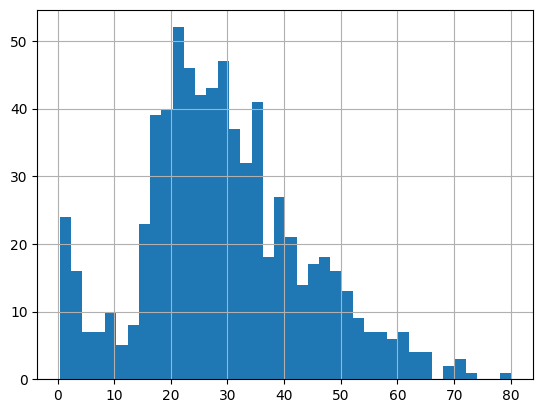

In [107]:
titanic.Age.hist(bins=40)

# And so much more ...

To name just a few:

- [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)
- [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
- [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)
- [json_normalize](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.io.json.json_normalize.html)
- [multiindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html)
- Combination of groupby with mean, max, aggregate or boxplots.
- ...